# Import software libraries and load the dataset #

In [3]:
import sys                                             # Read system parameters.
import os                                              # Interact with the operating system.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yellowbrick 
from yellowbrick.cluster import KElbowVisualizer                                    # Visualize elbow and silhouette plots.
import sklearn                                         # Perform data mining and analysis.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))


data_raw_file ='wholesale_customers_data.csv'
data_raw = pd.read_csv(data_raw_file)
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Libraries used in this project:
- Python 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
- NumPy 1.26.4
- pandas 2.2.2
- Matplotlib 3.9.2
- Yellowbrick 1.5
- scikit-learn 1.5.1

Loaded 440 records from wholesale_customers_data.csv.


# Get acquainted with the dataset

In [4]:
# View data types and see if there are missing entries.
data_raw.info()
# View first 10 records.
data_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Deli              440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Examine the distribution of various features

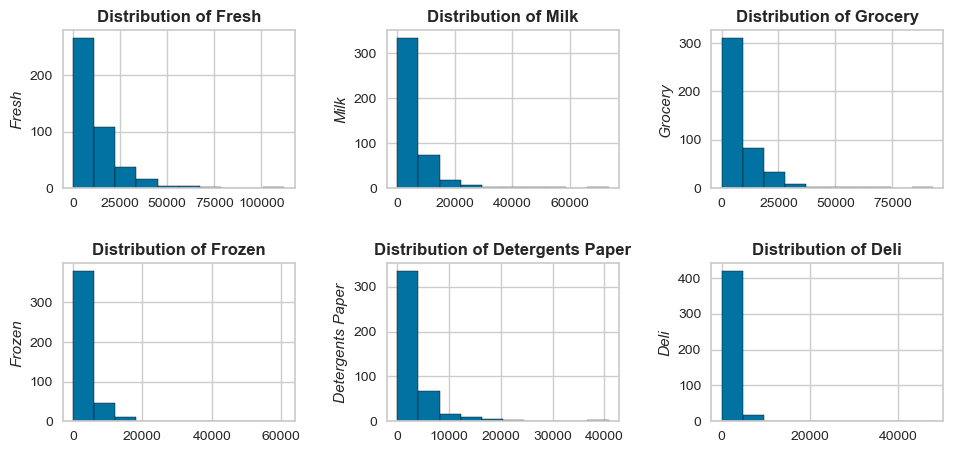

In [5]:
# Use Matplotlib to plot distribution histograms for all features.
fig, ax = plt.subplots(2, 3, figsize=(10,5))

ax[0,0].hist(data_raw['Fresh'], edgecolor='black')
ax[0,0].set_title('Distribution of Fresh', fontweight='bold')
ax[0,0].set_ylabel('Fresh', fontstyle='italic')

ax[0,1].hist(data_raw['Milk'], edgecolor='black')
ax[0,1].set_title('Distribution of Milk', fontweight='bold')
ax[0,1].set_ylabel('Milk', fontstyle='italic')

ax[0,2].hist(data_raw['Grocery'], edgecolor='black')
ax[0,2].set_title('Distribution of Grocery', fontweight='bold')
ax[0,2].set_ylabel('Grocery', fontstyle='italic')

ax[1,0].hist(data_raw['Frozen'], edgecolor='black')
ax[1,0].set_title('Distribution of Frozen', fontweight='bold')
ax[1,0].set_ylabel('Frozen', fontstyle='italic')

ax[1,1].hist(data_raw['Detergents_Paper'], edgecolor='black')
ax[1,1].set_title('Distribution of Detergents Paper', fontweight='bold')
ax[1,1].set_ylabel('Detergents Paper', fontstyle='italic')

ax[1,2].hist(data_raw['Deli'], edgecolor='black')
ax[1,2].set_title('Distribution of Deli', fontweight='bold')
ax[1,2].set_ylabel('Deli', fontstyle='italic')

plt.tight_layout(pad=2)

plt.show()

# Examine a general summary of statistics

In [6]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
data_raw.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Use a *k*-means model to label every row in the dataset

In [7]:
# Construct a k-means clustering model class object.
# Use 3 as the initial number of clusters.
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)

# Use fresh products and milk products only for the initial training data.
x_train = data_raw[['Milk', 'Fresh']]
# Fit the training data to the clustering object.
cluster.fit(x_train)
# Predict the cluster labels based on the training data.
cluster_label = cluster.predict(x_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Attach cluster labels to the original dataset

In [8]:
# Append the cluster labels to a new column in the original dataset.
data_raw['cluster'] = cluster_label
# Show a preview of rows in the dataset with cluster labels added.
data_raw.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


# Show clusters of customers based on fresh products and milk products sales

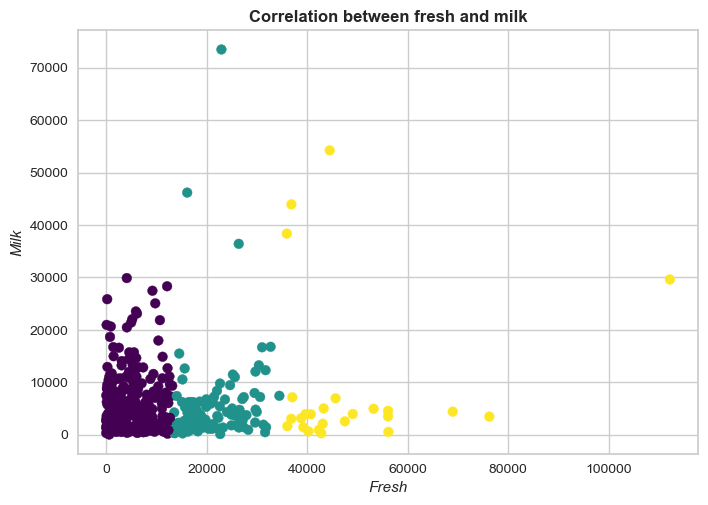

In [9]:
# Use Matplotlib to create a scatter plot of customer data.
# Use fresh products as the x-axis and milk products as the y-axis.
# Distinguish clusters by color.
plt.scatter(x=data_raw['Fresh'], y=data_raw['Milk'], c = data_raw['cluster'], cmap='viridis')

plt.title('Correlation between fresh and milk', fontweight='bold')
plt.xlabel('Fresh', fontstyle='italic')
plt.ylabel('Milk', fontstyle='italic')

plt.show()

# Use the elbow method to determine the optimal number of clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

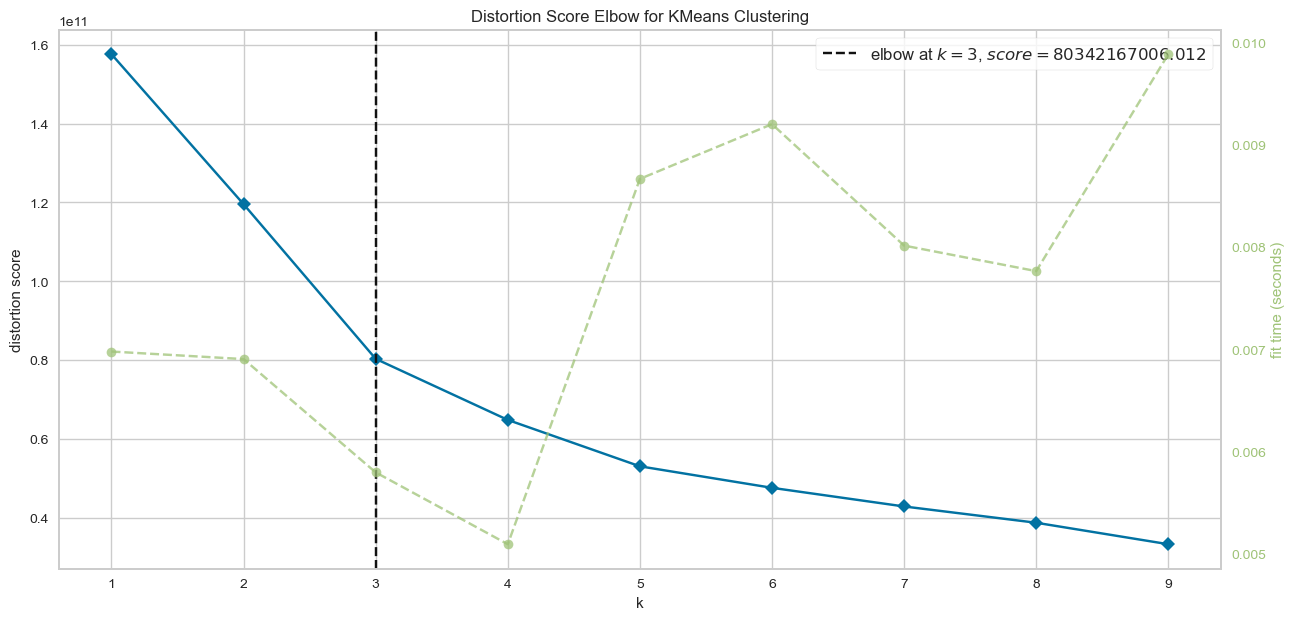

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Set new DataFrame 'X' equal to the full dataset (all features).
X = data_raw.copy()
# Use Yellowbrick to generate the elbow plot for 1 to 10 clusters on the full training data.

plt.rcParams['figure.figsize']=(15,7)

visualizer = KElbowVisualizer(cluster, k=(1,10))
visualizer.fit(X)
visualizer.poof()

# Use silhouette analysis to determine the optimal number of clusters

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Create several k-means models and generate the silhouette scores for each.
# Create the models using a range of 2 to 5 clusters.
range_of_k = [2, 3, 4, 5]

high_score = 0
optima_n_cluster = 0

for k in range_of_k:
    cluster = KMeans(n_clusters=k)
    cluster_labels = cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'For {k} clusters silhoette average is {silhouette_avg}')

    if silhouette_avg > high_score:
        high_score = silhouette_avg
        optima_n_cluster = k
    
# Note the high score.
print(f'The optima of clusters is {optima_n_cluster}. The highest score is {high_score}')

For 2 clusters silhoette average is 0.5115333898210055
For 3 clusters silhoette average is 0.4593059149663506
For 4 clusters silhoette average is 0.3955556156203816
For 5 clusters silhoette average is 0.36902148513842653
The optima of clusters is 2. The highest score is 0.5115333898210055


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

# Generate and preview cluster labels using the full dataset

In [19]:
# Construct a k-means clustering model class object and fit the full training data to it.
# Use your judgment to determine the desired number of clusters.
claster = KMeans(n_clusters = 2)
claster.fit(data_raw)

# Predict the cluster labels based on the full training data, then append the labels to the dataset.
data_raw['cluster'] = claster.predict(data_raw)

# Show the first 20 rows in the dataset with cluster labels added.
data_raw.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
